epoch: 1
weights: [[0.05711258]
 [0.33054281]
 [0.75710676]]
epoch: 2
weights: [[-0.04288742]
 [ 0.18054281]
 [ 0.65710676]]
epoch: 3
weights: [[-0.14288742]
 [ 0.03054281]
 [ 0.55710676]]
epoch: 4
weights: [[-0.24288742]
 [-0.11945719]
 [ 0.45710676]]
epoch: 5
weights: [[-0.29288742]
 [-0.16945719]
 [ 0.40710676]]
Finished


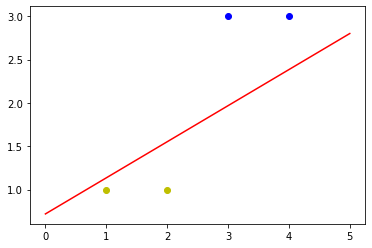

In [5]:
import numpy as np 
import matplotlib.pyplot as plt 
# 定义输入，我们习惯上用一行代表一个数据 
X = np.array([[1,3,3], 
              [1,4,3], 
              [1,1,1], 
              [1,2,1]]) 
# 定义标签，我们习惯上用一行表示一个数据的标签 
T = np.array([[1], 
              [1], 
              [-1], 
              [-1]]) 
 
# 权值初始化，3 行 1 列 
# np.random.random 可以生成 0-1 的随机数 
W = np.random.random([3,1]) 
# 学习率设置 
lr = 0.1 
# 神经网络输出 
Y = 0 
 
# 更新一次权值 
def train(): 
    # 使用全局变量 W 
    global W 
    # 同时计算 4 个数据的预测值 
    # Y 的形状为(4,1)-4 行 1 列 
    Y = np.sign(np.dot(X,W))  
    # T - Y 得到 4 个的标签值与预测值的误差 E。形状为(4,1) 
    E = T - Y  
    # X.T 表示 X 的转置矩阵，形状为(3,4) 
    # 我们一共有 4 个数据，每个数据 3 个值。定义第 i 个数据的第 j 个特征值为 xij 
    # 如第 1 个数据，第 2 个值为 x12 
    # X.T.dot(T - Y)为一个 3 行 1 列的数据： 
    # 第 1 行等于：x00×e0+x10×e1+x20×e2+x30×e3，它会调整第 1 个神经元对应的权值 
    # 第 2 行等于：x01×e0+x11×e1+x21×e2+x31×e3，它会调整第 2 个神经元对应的权值 
    # 第 3 行等于：x02×e0+x12×e1+x22×e2+x32×e3，它会影调整 3 个神经元对应的权值 
    # X.shape 表示 X 的形状 X.shape[0]得到 X 的行数，表示有多少个数据 
# X.shape[1]得到列数，表示每个数据有多少个特征值。 
# 这里的公式跟书中公式 3.2 看起来有些不同，原因是这里的计算是矩阵运算，书中公式 3.2 是单个元素的计算。如果在草稿子上仔细推算的话你会发现它们的本质是一样的 
    delta_W = lr * (X.T.dot(E)) / X.shape[0] 
    W = W + delta_W 
# 训练 100 次
for i in range(100): 
    #更新一次权值 
    train() 
    # 打印当前训练次数 
    print('epoch:',i + 1) 
    # 打印当前权值 
    print('weights:',W) 
    # 计算当前输出  
    Y = np.sign(np.dot(X,W))  
    # .all()表示 Y 中的所有值跟 T 中所有值都对应相等，结果才为真 
    if(Y == T).all():  
        print('Finished') 
        # 跳出循环 
        break 
 
#————————以下为画图部分————————# 
# 正样本的 xy 坐标 
x1 = [3,4] 
y1 = [3,3] 
# 负样本的 xy 坐标 
x2 = [1,2] 
y2 = [1,1] 
 
# 计算分类边界线的斜率以及截距 
# 神经网络的信号总和为 w0×x0+w1×x1+w2×x2 
# 当信号总和大于 0 再进过激活函数，模型的预测值会得到 1 
# 当信号总和小于 0 再进过激活函数，模型的预测值会得到-1 
# 所以当信号总和 w0×x0+w1×x1+w2×x2=0 时为分类边界线表达式 
# 我们在画图的时候把 x1，x2 分别看成是平面坐标系中的 x 和 y 
# 可以得到：w0 + w1×x + w2 × y = 0 
# 经过通分：y = -w0/w2 - w1×x/w2，因此可以得到： 
k = - W[1] / W[2] 
d =  -W[0] / W[2] 
# 设定两个点 
xdata = (0,5) 
# 通过两个点来确定一条直线，用红色的线来画出分界线 
plt.plot(xdata,xdata * k + d,'r') 
# 用蓝色的点画出正样本 
plt.scatter(x1,y1,c='b') 
# 用黄色的点来画出负样本 
plt.scatter(x2,y2,c='y') 
# 显示图案 
plt.show() 

C:\Users\HUAWEI
